# QuTiP example: Bloch sphere animation

J.R. Johansson and P.D. Nation

For more information about QuTiP see [http://qutip.org](http://qutip.org)

Animation with qutip and matplotlib: decaying qubit visualized in a Bloch sphere.
(Animation with matplotlib does not work yet in python3)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

In [4]:
from qutip import *
from qutip.ipynbtools import plot_animation

In [5]:
def qubit_integrate(w, theta, gamma1, gamma2, psi0, tlist):
    # operators and the hamiltonian
    sx = sigmax(); sy = sigmay(); sz = sigmaz(); sm = sigmam()
    H = w * (np.cos(theta) * sz + np.sin(theta) * sx)
    # collapse operators
    c_op_list = []
    n_th = 0.5 # temperature
    rate = gamma1 * (n_th + 1)
    if rate > 0.0: c_op_list.append(np.sqrt(rate) * sm)
    rate = gamma1 * n_th
    if rate > 0.0: c_op_list.append(np.sqrt(rate) * sm.dag())
    rate = gamma2
    if rate > 0.0: c_op_list.append(np.sqrt(rate) * sz)


    # evolve and calculate expectation values
    output = mesolve(H, psi0, tlist, c_op_list, [sx, sy, sz])  
    return output

In [6]:
w     = 1.0 * 2 * np.pi  # qubit angular frequency
theta = 0.2 * np.pi      # qubit angle from sigma_z axis (toward sigma_x axis)
gamma1 = 0.5             # qubit relaxation rate
gamma2 = 0.2             # qubit dephasing rate
# initial state
a = 1.0
psi0 = (a* basis(2,0) + (1-a)*basis(2,1))/(np.sqrt(a**2 + (1-a)**2))
tlist = np.linspace(0, 4, 150)

In [7]:
result = qubit_integrate(w, theta, gamma1, gamma2, psi0, tlist)

In [8]:
def plot_setup(result):    
    
    fig = plt.figure(figsize=(8,8))
    axes = Axes3D(fig, azim=-40,elev=30)

    return fig, axes

In [9]:
sphere = None

def plot_result(result, n, fig=None, axes=None):

    global sphere
    
    if fig is None or axes is None:
        fig, axes = plot_setup(result)

    if not sphere:
        sphere = Bloch(axes=axes)
        sphere.vector_color = ['r']
        
    sphere.clear()
    sphere.add_vectors([np.sin(theta), 0, np.cos(theta)])
    sphere.add_points([result.expect[0][:n+1], result.expect[1][:n+1], result.expect[2][:n+1]], meth='l')
    sphere.make_sphere()

    return fig, axes

ValueError: unknown file extension: .mp4

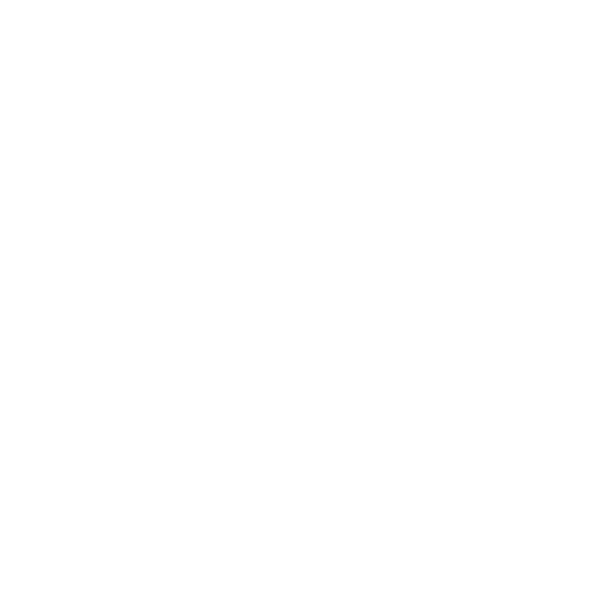

<Figure size 360x360 with 0 Axes>

In [10]:
plot_animation(plot_setup, plot_result, result)

## Versions

In [ ]:
from qutip.ipynbtools import version_table

version_table()